In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
#load data
kidney=pd.read_excel("kidney_disease.xlsx")
kidney

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [3]:
#viewing all columns
pd.set_option("display.max_columns",None)
kidney

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51,7200,5.9,no,no,no,good,no,no,notckd


In [4]:
kidney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [5]:
#checking null values
kidney.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [6]:
#checking null values percentage
(kidney.isnull().sum()/len(kidney))*100

id                 0.00
age                2.25
bp                 3.00
sg                11.75
al                11.50
su                12.25
rbc               38.00
pc                16.25
pcc                1.00
ba                 1.00
bgr               11.00
bu                 4.75
sc                 4.25
sod               21.75
pot               22.00
hemo              13.00
pcv               17.50
wc                26.25
rc                32.50
htn                0.50
dm                 0.50
cad                0.50
appet              0.25
pe                 0.25
ane                0.25
classification     0.00
dtype: float64

<Axes: >

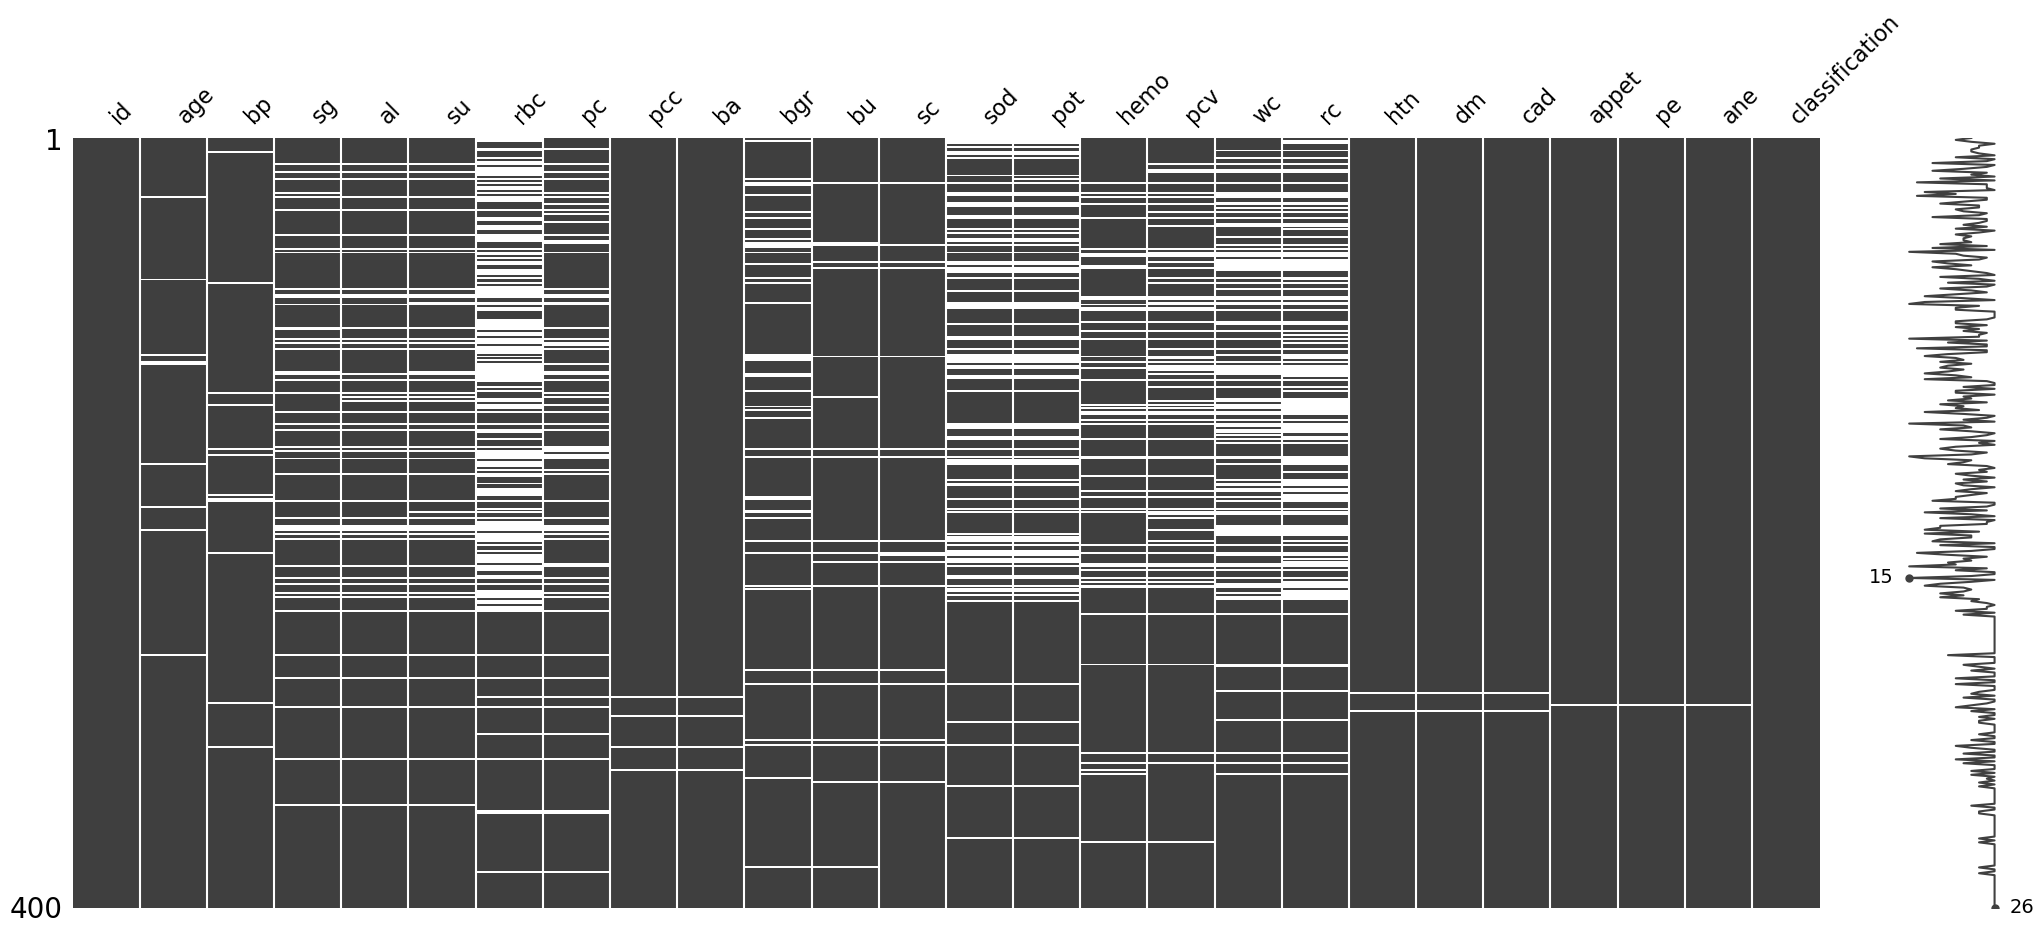

In [7]:
import missingno
missingno.matrix(kidney)

<Axes: >

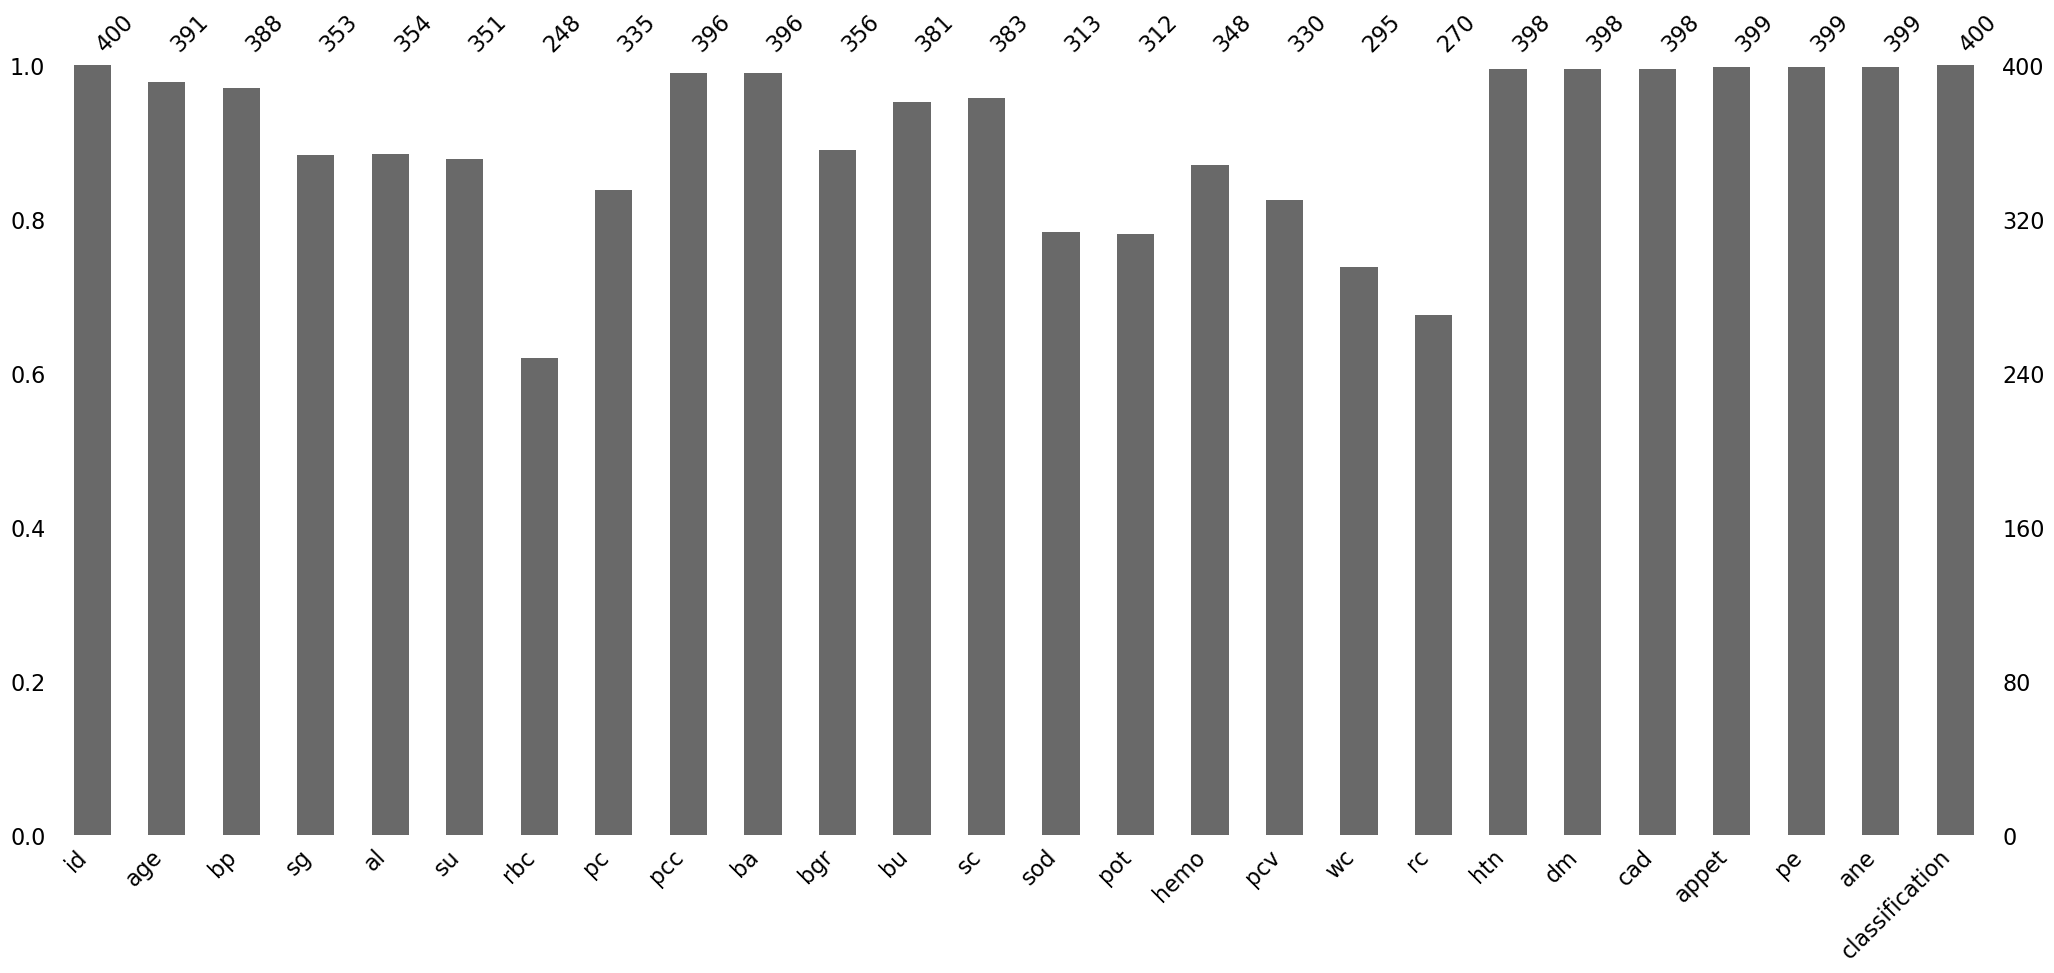

In [8]:
missingno.bar(kidney)

From the above observation, its evident that rbc column have many null values so this column can be droped from the table . the other columns are treated using fill method.

In [9]:
kidney.drop(["id","rbc"],axis=1,inplace=True)

In [10]:
# Fill categorical columns using forward fill
categorical_cols = ['pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
kidney[categorical_cols] = kidney[categorical_cols].fillna(method='ffill')

# Fill numerical columns using interpolation (with fallback to ffill/bfill)
numerical_cols = ['bp', 'sg', 'al', 'bu', 'sc', 'bgr', 'hemo','sod', 'pcv', 'wc', 'rc','su','pot',"age"]
kidney[numerical_cols] = kidney[numerical_cols].interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')

C:\Users\DELL\AppData\Local\Temp\ipykernel_5928\1539513122.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  kidney[categorical_cols] = kidney[categorical_cols].fillna(method='ffill')
C:\Users\DELL\AppData\Local\Temp\ipykernel_5928\1539513122.py:7: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  kidney[numerical_cols] = kidney[numerical_cols].interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\DELL\AppData\Local\Temp\ipykernel_5928\1539513122.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  kidney[numerical_cols] = kidney[numerical_cols].interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')


In [11]:
kidney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             400 non-null    float64
 1   bp              400 non-null    float64
 2   sg              400 non-null    float64
 3   al              400 non-null    float64
 4   su              400 non-null    float64
 5   pc              400 non-null    object 
 6   pcc             400 non-null    object 
 7   ba              400 non-null    object 
 8   bgr             400 non-null    float64
 9   bu              400 non-null    float64
 10  sc              400 non-null    float64
 11  sod             400 non-null    float64
 12  pot             400 non-null    float64
 13  hemo            400 non-null    float64
 14  pcv             400 non-null    object 
 15  wc              400 non-null    object 
 16  rc              400 non-null    object 
 17  htn             400 non-null    obj

EDA

<Axes: >

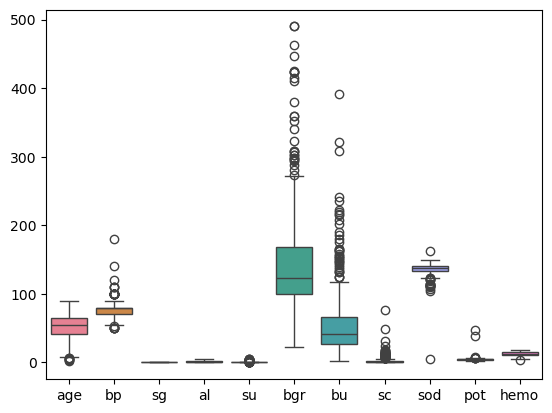

In [12]:
#univariant analysis
sns.boxplot(kidney)

<Axes: xlabel='count', ylabel='pc'>

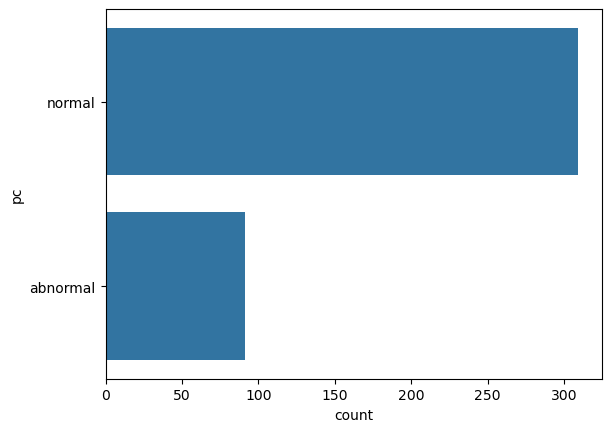

In [13]:
sns.countplot(kidney["pc"])

<Axes: xlabel='count', ylabel='pcc'>

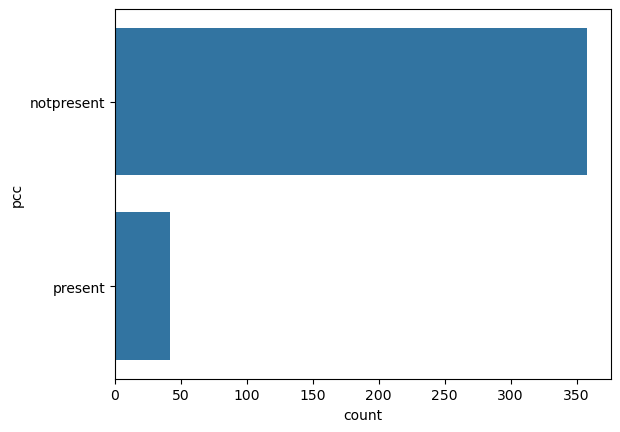

In [14]:
sns.countplot(kidney["pcc"])

<Axes: xlabel='count', ylabel='pcv'>

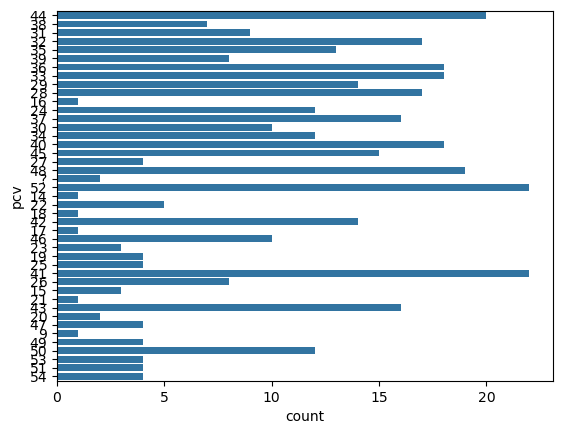

In [15]:
sns.countplot(kidney["pcv"])
#the datatype is wrong in dataset

In [16]:
kidney["pcv"].value_counts()

pcv
52    22
41    22
44    20
48    19
36    18
33    18
40    18
32    17
28    17
43    16
37    16
45    15
42    14
29    14
35    13
50    12
34    12
24    12
30    10
46    10
31     9
39     8
26     8
38     7
22     5
53     4
51     4
49     4
47     4
54     4
25     4
19     4
27     4
15     3
23     3
20     2
?      2
21     1
17     1
9      1
18     1
16     1
14     1
Name: count, dtype: int64

In [17]:
kidney.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [18]:
#replacing an unkown character and the datatype
kidney["pcv"]=kidney["pcv"].replace('?',np.nan)
kidney["pcv"]=kidney["pcv"].fillna(kidney["pcv"].mode()[0])

C:\Users\DELL\AppData\Local\Temp\ipykernel_5928\4217890642.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  kidney["pcv"]=kidney["pcv"].replace('?',np.nan)


C:\Users\DELL\AppData\Local\Temp\ipykernel_5928\78863583.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(kidney["pcv"])


<Axes: xlabel='pcv', ylabel='Density'>

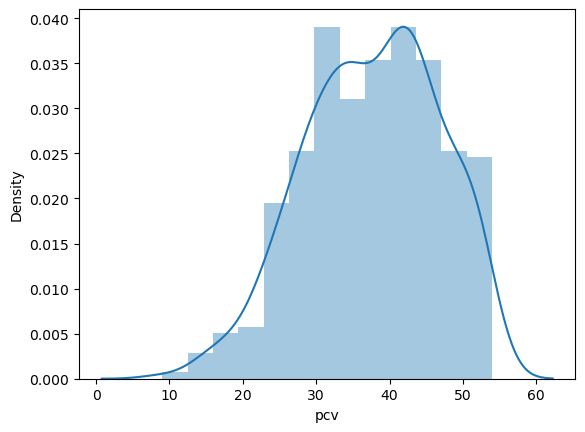

In [19]:
#distributionplot
sns.distplot(kidney["pcv"])

<Axes: xlabel='count', ylabel='wc'>

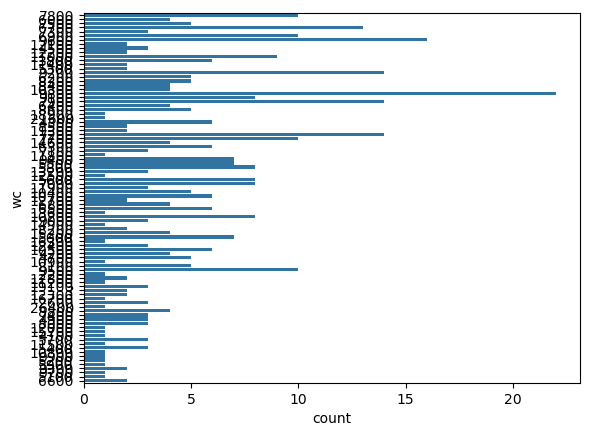

In [20]:
sns.countplot(kidney["wc"])
#the datatype is wrong in dataset

In [21]:
kidney["wc"].unique()

array([7800, 6000, 7500, 6700, 7300, 6900, 9600, 12100, 4500, 12200,
       11000, 3800, 11400, 5300, 9200, 6200, 8300, 8400, 10300, 9800,
       9100, 7900, 6400, 8600, 18900, 21600, 4300, 8500, 11300, 7200,
       7700, 14600, 6300, 7100, 11800, 9400, 5500, 5800, 13200, 12500,
       5600, 7000, 11900, 10400, 10700, 12700, 6800, 6500, 13600, 10200,
       9000, 14900, 8200, 15200, 5000, 16300, 12400, 10500, 4200, 4700,
       10900, 8100, 9500, 2200, 12800, 11200, 19100, '?', 12300, 16700,
       2600, 26400, 8800, 7400, 4900, 8000, 12000, 15700, 4100, 5700,
       11500, 5400, 10800, 9900, 5200, 5900, 9300, 9700, 5100, 6600],
      dtype=object)

In [22]:
kidney["wc"].value_counts()

wc
9800     22
9600     16
7200     14
9200     14
7900     14
         ..
11200     1
26400     1
13600     1
16700     1
10900     1
Name: count, Length: 90, dtype: int64

In [23]:
pd.set_option("display.max_rows",None)
kidney["wc"].value_counts()

wc
9800     22
9600     16
7200     14
9200     14
7900     14
6700     13
9500     10
7700     10
7800     10
6900     10
11000     9
9100      8
10200     8
7000      8
5600      8
5800      8
5500      7
9400      7
5000      7
6300      6
4300      6
10700     6
6500      6
10500     6
3800      6
4700      5
10400     5
7500      5
8100      5
8600      5
6200      5
8300      5
8800      4
8400      4
6000      4
6800      4
10300     4
6400      4
14600     4
15200     4
4200      4
9000      3
19100     3
12400     3
5400      3
11900     3
13200     3
7100      3
7300      3
2600      3
7400      3
4900      3
4500      3
8000      3
5700      3
?         2
12800     2
9300      2
12300     2
12700     2
5300      2
11300     2
12100     2
12200     2
11400     2
8500      2
6600      2
8200      2
12500     1
14900     1
5100      1
9700      1
5900      1
5200      1
9900      1
10800     1
2200      1
11500     1
4100      1
11800     1
15700     1
12000     1
16300     1
1

In [24]:
kidney["wc"]=kidney["wc"].replace("?",np.nan)
kidney["wc"]=kidney["wc"].fillna(kidney["wc"].mode()[0])
kidney["wc"].unique()

C:\Users\DELL\AppData\Local\Temp\ipykernel_5928\141512546.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  kidney["wc"]=kidney["wc"].replace("?",np.nan)


array([ 7800.,  6000.,  7500.,  6700.,  7300.,  6900.,  9600., 12100.,
        4500., 12200., 11000.,  3800., 11400.,  5300.,  9200.,  6200.,
        8300.,  8400., 10300.,  9800.,  9100.,  7900.,  6400.,  8600.,
       18900., 21600.,  4300.,  8500., 11300.,  7200.,  7700., 14600.,
        6300.,  7100., 11800.,  9400.,  5500.,  5800., 13200., 12500.,
        5600.,  7000., 11900., 10400., 10700., 12700.,  6800.,  6500.,
       13600., 10200.,  9000., 14900.,  8200., 15200.,  5000., 16300.,
       12400., 10500.,  4200.,  4700., 10900.,  8100.,  9500.,  2200.,
       12800., 11200., 19100., 12300., 16700.,  2600., 26400.,  8800.,
        7400.,  4900.,  8000., 12000., 15700.,  4100.,  5700., 11500.,
        5400., 10800.,  9900.,  5200.,  5900.,  9300.,  9700.,  5100.,
        6600.])

C:\Users\DELL\AppData\Local\Temp\ipykernel_5928\4189975681.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(kidney["wc"])


<Axes: xlabel='wc', ylabel='Density'>

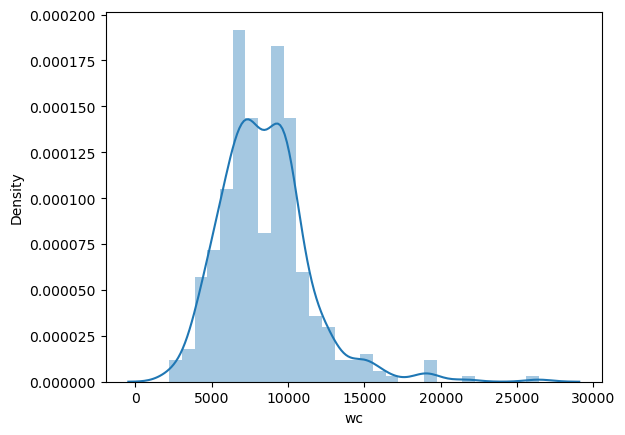

In [25]:
sns.distplot(kidney["wc"])

<Axes: xlabel='count', ylabel='rc'>

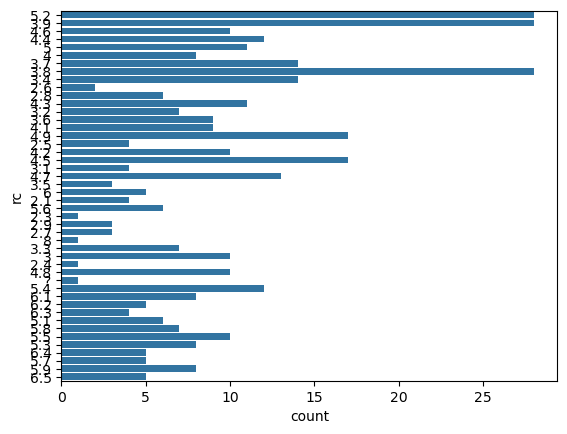

In [26]:
sns.countplot(kidney["rc"])
#the datatype is wrong in dataset

In [27]:
kidney["rc"].value_counts()

rc
5.2    28
3.9    28
3.8    28
4.5    17
4.9    17
3.4    14
3.7    14
4.7    13
5.4    12
4.4    12
4.3    11
5      11
3      10
4.8    10
4.2    10
4.6    10
5.5    10
3.6     9
4.1     9
5.3     8
6.1     8
5.9     8
4       8
5.8     7
3.3     7
3.2     7
2.8     6
5.6     6
5.1     6
6.4     5
6.2     5
5.7     5
6.5     5
6       5
6.3     4
3.1     4
2.5     4
2.1     4
2.7     3
2.9     3
3.5     3
2.6     2
?       1
2.4     1
8       1
2.3     1
Name: count, dtype: int64

In [28]:
kidney["rc"]=kidney["rc"].replace("?",np.nan)
kidney["rc"]=kidney["rc"].fillna(kidney["rc"].mode()[0])
kidney["rc"].unique()

C:\Users\DELL\AppData\Local\Temp\ipykernel_5928\2866204169.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  kidney["rc"]=kidney["rc"].replace("?",np.nan)


array([5.2, 3.9, 4.6, 4.4, 5. , 4. , 3.7, 3.8, 3.4, 2.6, 2.8, 4.3, 3.2,
       3.6, 4.1, 4.9, 2.5, 4.2, 4.5, 3.1, 4.7, 3.5, 6. , 2.1, 5.6, 2.3,
       2.9, 2.7, 8. , 3.3, 3. , 2.4, 4.8, 5.4, 6.1, 6.2, 6.3, 5.1, 5.8,
       5.5, 5.3, 6.4, 5.7, 5.9, 6.5])

C:\Users\DELL\AppData\Local\Temp\ipykernel_5928\2968428880.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(kidney["rc"])


<Axes: xlabel='rc', ylabel='Density'>

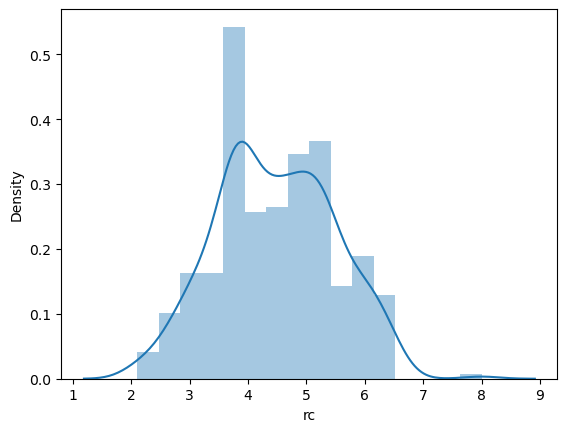

In [29]:
sns.distplot(kidney["rc"])

<Axes: >

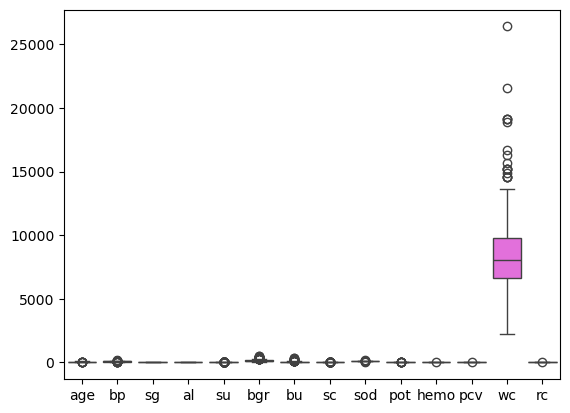

In [30]:
sns.boxplot(kidney)

<Axes: xlabel='count', ylabel='htn'>

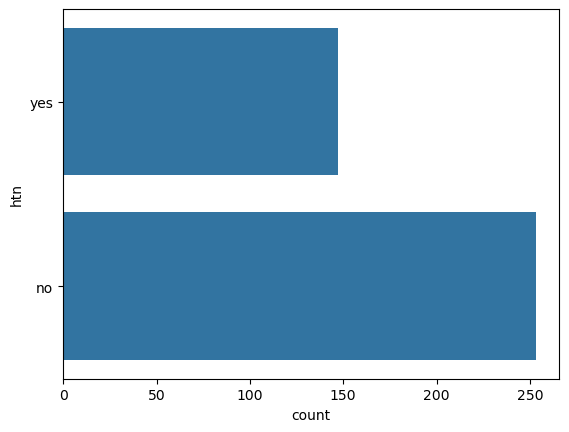

In [31]:
sns.countplot(kidney["htn"])

<Axes: xlabel='count', ylabel='dm'>

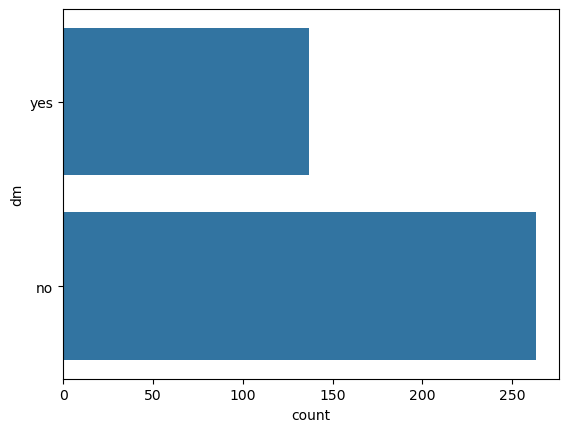

In [32]:
sns.countplot(kidney["dm"])

<Axes: xlabel='count', ylabel='cad'>

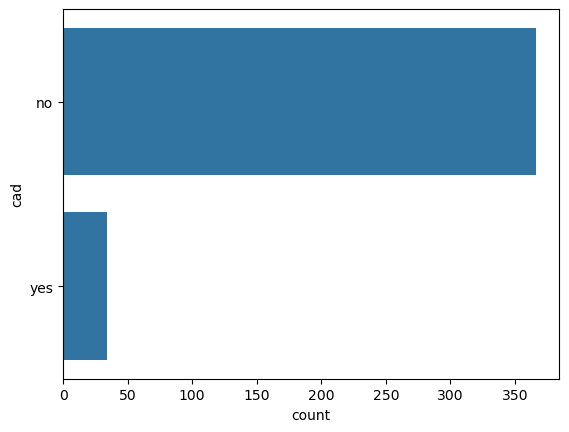

In [33]:
sns.countplot(kidney["cad"])

<Axes: xlabel='count', ylabel='appet'>

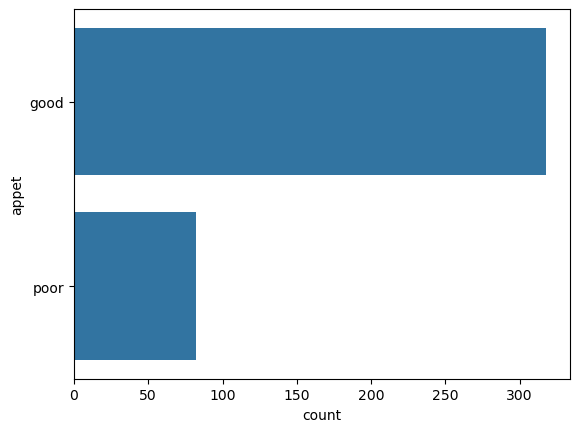

In [34]:
 sns.countplot(kidney["appet"])

<Axes: xlabel='count', ylabel='pe'>

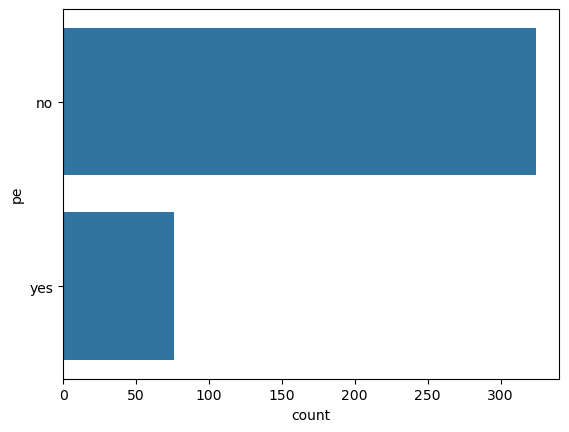

In [35]:
sns.countplot(kidney["pe"])

<Axes: xlabel='count', ylabel='ane'>

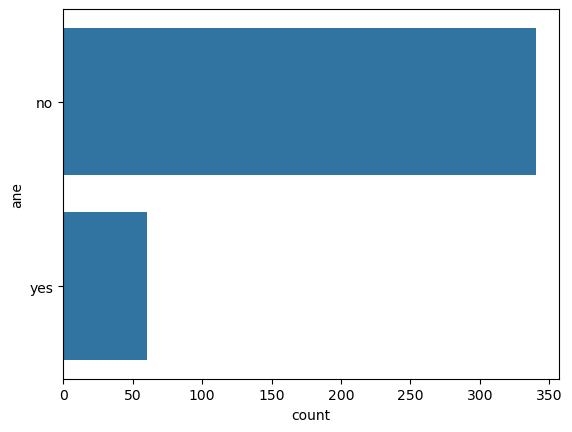

In [36]:
sns.countplot(kidney["ane"])

<Axes: xlabel='count', ylabel='classification'>

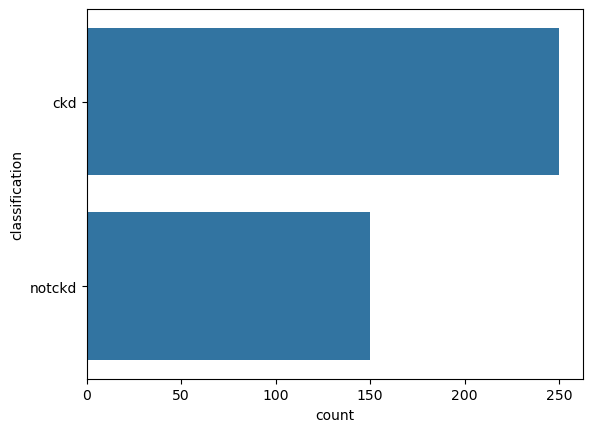

In [37]:
sns.countplot(kidney["classification"])

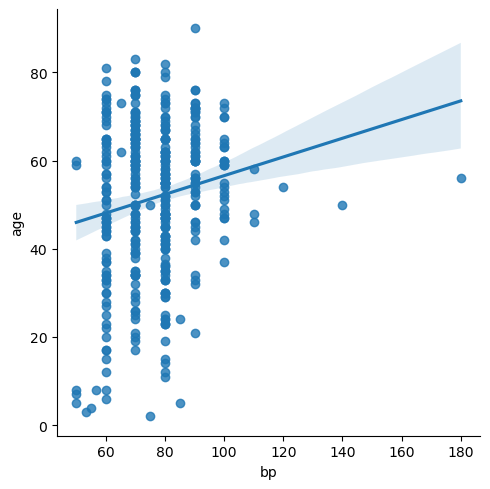

In [38]:
#bivariant analysis
sns.lmplot(data=kidney,x="bp",y="age")
#outlier present ,linear, bp more ranging from 60-80

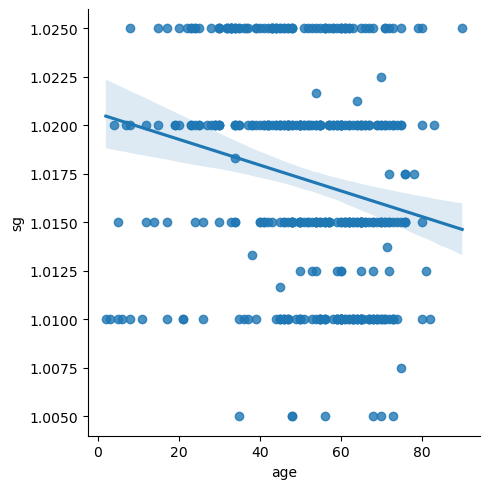

In [39]:
sns.lmplot(data=kidney,x="age",y="sg")
#negative correlation suggests that age may be a factor influencing specific gravity.

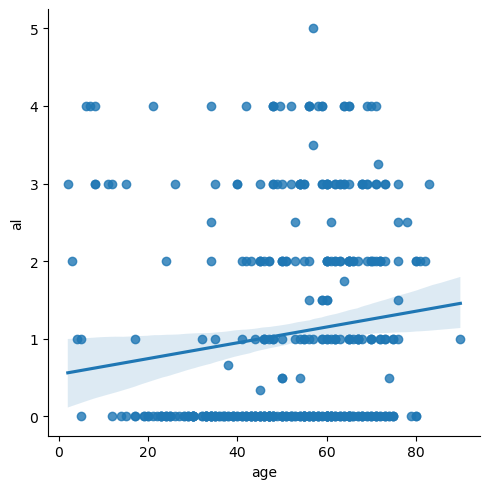

In [40]:
sns.lmplot(data=kidney,x="age",y="al")
#weak positive correlation suggests that age might be a minor factor influencing albumin, but it's not a strong predictor.

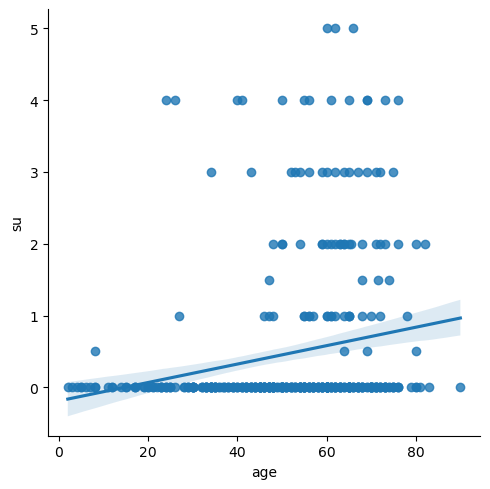

In [41]:
sns.lmplot(data=kidney,x="age",y="su")
#The weak positive correlation suggests that age might be a minor factor influencing sugar, but it's not a strong predictor.

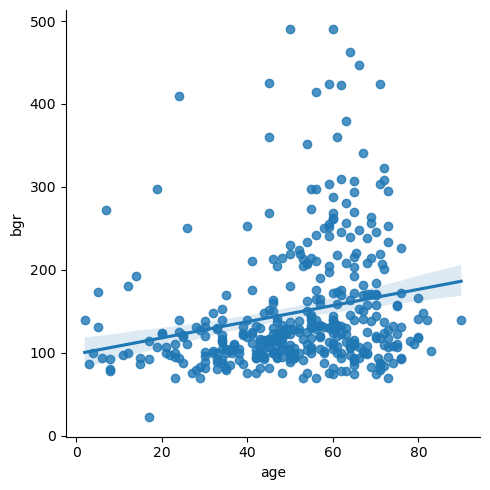

In [42]:
sns.lmplot(data=kidney,x="age",y="bgr")
#The weak positive correlation suggests that age might be a minor factor influencing bgr, but it's not a strong predictor.

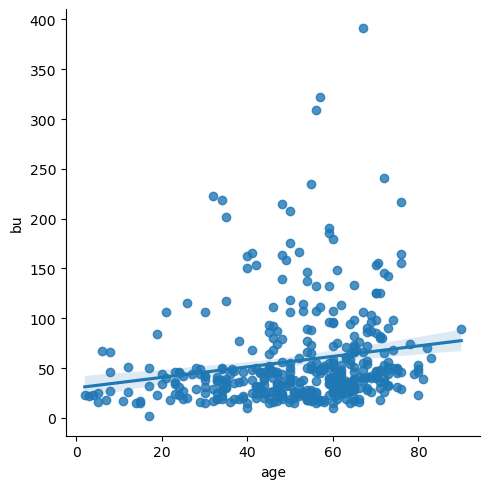

In [43]:
sns.lmplot(data=kidney,x="age",y="bu")
#weak positive correlation suggests that age might be a minor factor influencing bu, but it's not a strong predictor

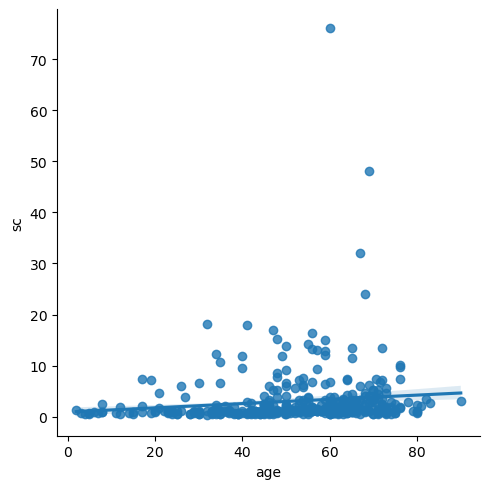

In [44]:
sns.lmplot(data=kidney,x="age",y="sc")

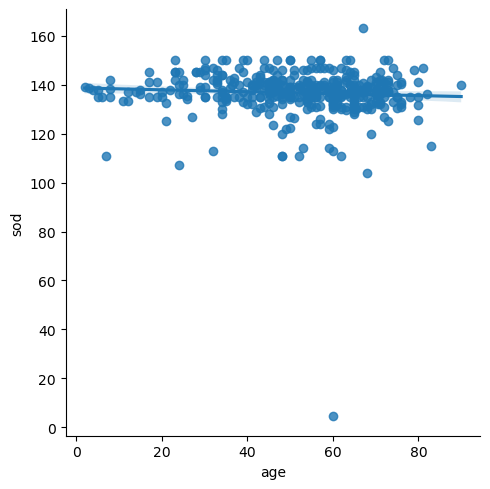

In [45]:
sns.lmplot(data=kidney,x="age",y="sod")

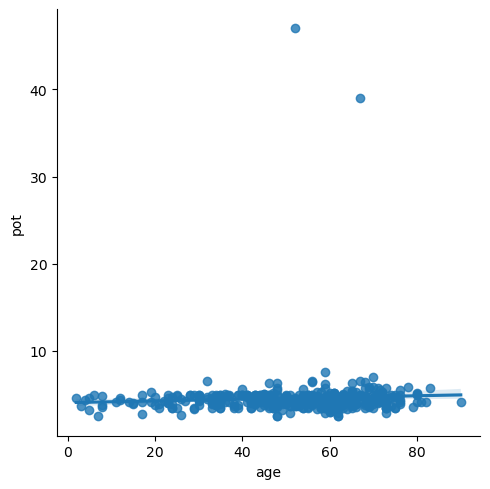

In [46]:
sns.lmplot(data=kidney,x="age",y="pot")

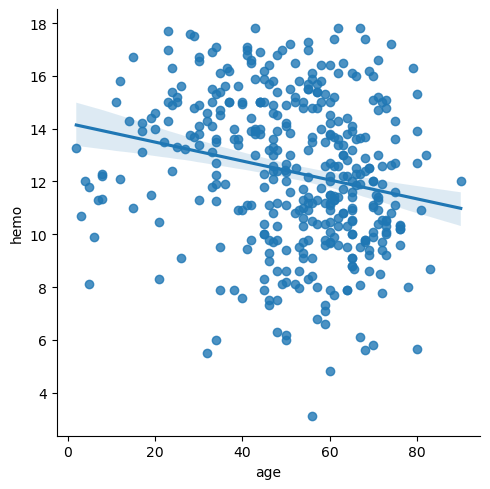

In [47]:
sns.lmplot(data=kidney,x="age",y="hemo")

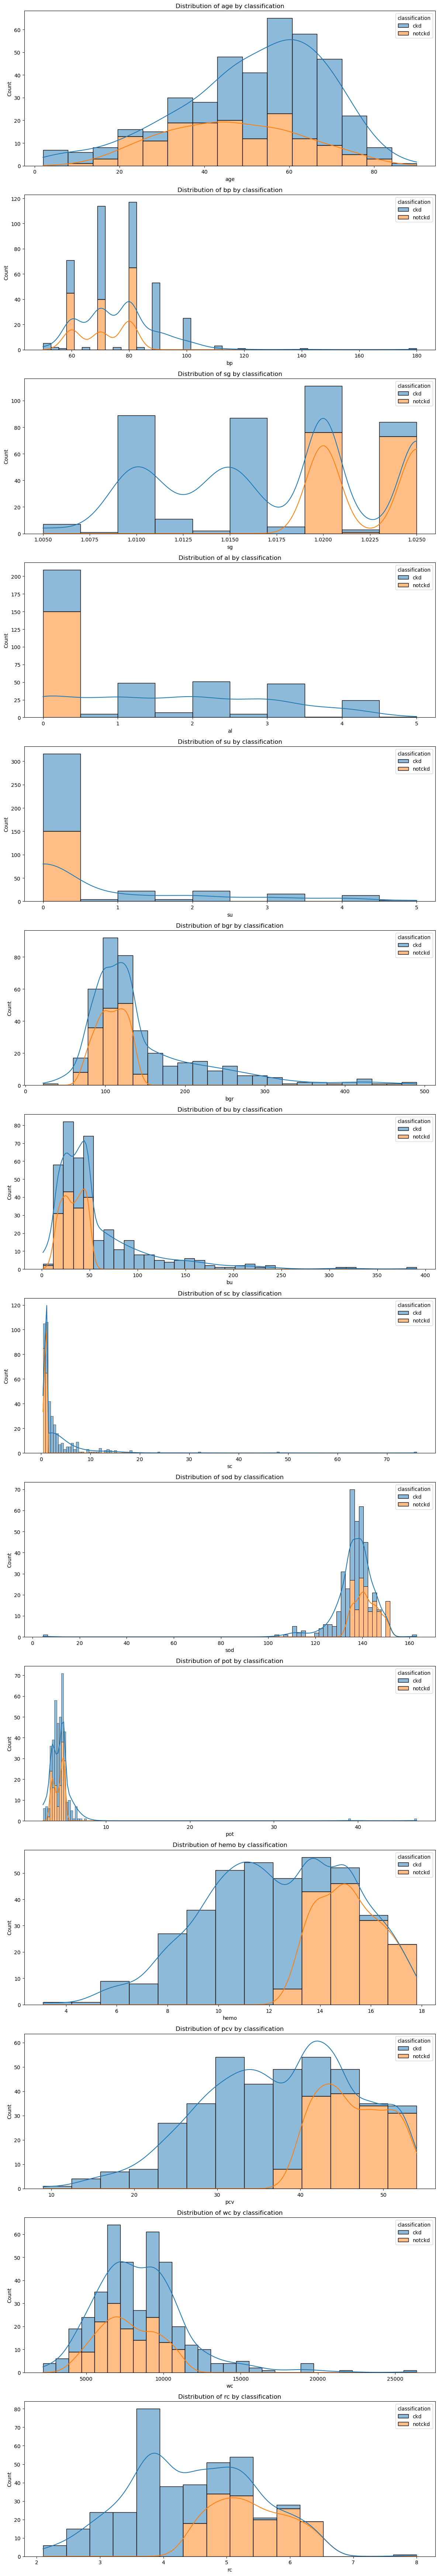

In [48]:
#bivariant analysis with target columns vs other numericcolumns
categorical_col = 'classification'  
numeric_columns = kidney.select_dtypes(include=['number']).columns
fig, axes = plt.subplots(nrows=len(numeric_columns), figsize=(12, 5 * len(numeric_columns)))

# Loop through numerical columns and plot histograms
for i, col in enumerate(numeric_columns):
    sns.histplot(data=kidney, x=col, hue=categorical_col, multiple='stack', kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col} by {categorical_col}')

plt.tight_layout()
plt.show()

insights
*Older individuals are more likely to have ckd.
*The plot suggests that (blood pressure is a potential risk factor) for chronic kidney disease. Individuals with higher blood pressure are more likely to have ckd.
*The plot suggests that (specific gravity might be an indicator of chronic kidney disease.) Individuals with lower specific gravity values (around 1.010) are more likely to have ckd.
*The plot suggests that (albumin might be a strong indicator of chronic kidney disease). Individuals with ckd have a higher likelihood of having albumin levels above 0 compared to individuals without ckd
*The plot suggests that (sugar might be a strong indicator of chronic kidney disease.) Individuals with ckd have a higher likelihood of having sugar levels above 0 compared to individuals without ckd.
*The plot suggests that (blood glucose random might be an indicator of chronic kidney disease.) Individuals with ckd tend to have a wider range of bgr values, including higher values, compared to individuals without ckd.
*The plot suggests that (blood urea might be a strong indicator of chronic kidney disease). Individuals with ckd tend to have a wider range of bu values, including higher values, compared to individuals without ckd.
*The plot suggests that (serum creatinine is a strong indicator of chronic kidney disease.) Individuals with ckd tend to have a wider range of sc values, including much higher values, compared to individuals without ckd.
*The plot suggests that (sodium might be a weak indicator of chronic kidney disease.) Individuals with ckd tend to have a wider range of sodium values, including a small group with slightly lower sodium levels (around 130), compared to individuals without ckd. However, the majority of individuals in both groups have similar sodium levels around 135-140.
*The plot suggests that (potassium is a strong indicator of chronic kidney disease.) Individuals with ckd tend to have a wider range of potassium values, including much higher values, compared to individuals without ckd.
hemo is essential
*pcv is also essential if the person with pcv less than 40 has high chance of getting affected
*wc" (White Blood Cell count) tends to be higher and more variable in individuals with Chronic Kidney Disease compared to those without the disease.
*rc with less value shows the person is affected by disease

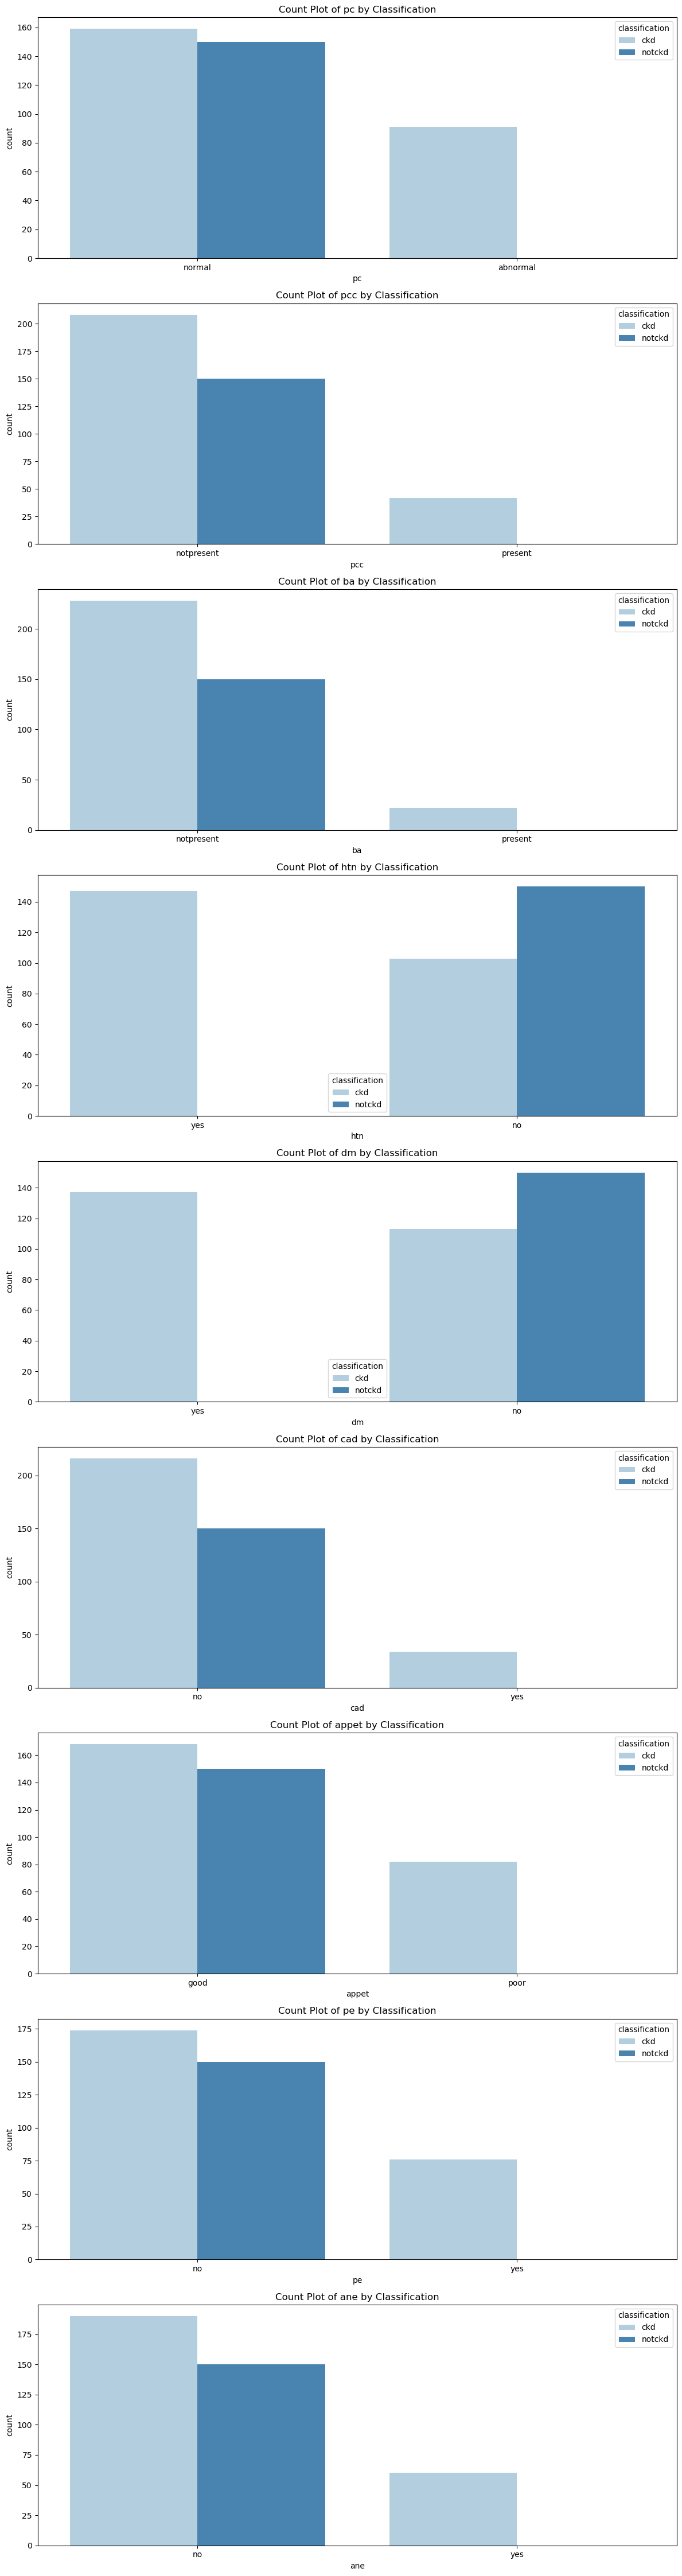

In [49]:
# #bivariant analysis with target columns vs other categorical columns
categorical_columns = kidney.select_dtypes(include=['object', 'category']).columns
categorical_columns = [col for col in categorical_columns if col != 'classification']

# Creating subplots
fig, axes = plt.subplots(nrows=len(categorical_columns), figsize=(12, 5 * len(categorical_columns)))

# Loop through categorical columns and plot count plots
for i, col in enumerate(categorical_columns):
    sns.countplot(x=kidney[col], hue=kidney['classification'], ax=axes[i], palette='Blues')
    axes[i].set_title(f'Count Plot of {col} by Classification')

plt.tight_layout()
plt.show()


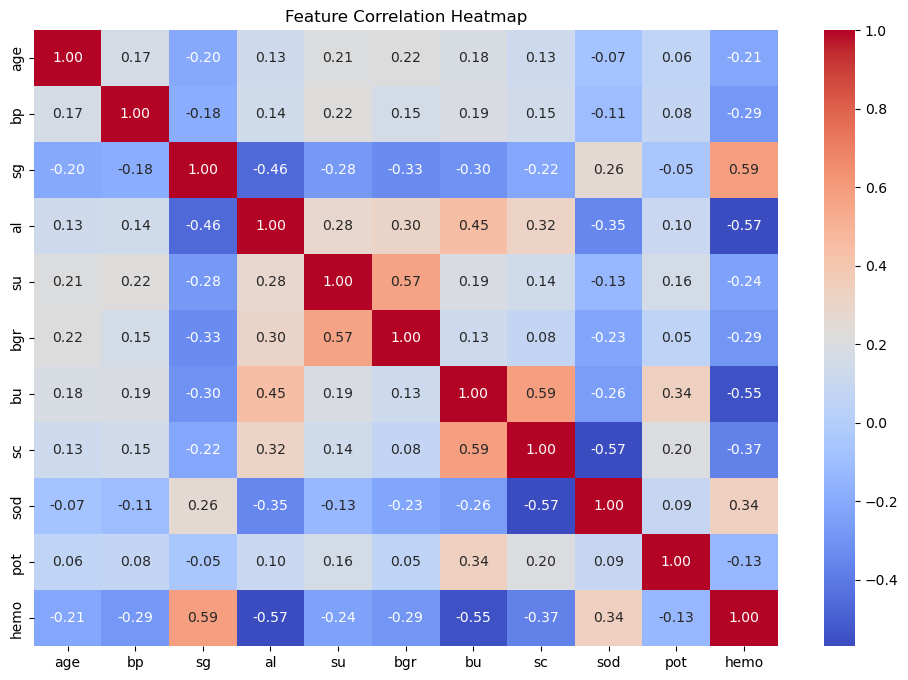

In [50]:
#multivariant analysis
cols=["id", "rbc","pc","pcc","ba", "pcv","wc","rc","htn","dm","cad","appet","pe","ane","classification"]
heat_column=kidney.drop(columns=cols,errors="ignore")
corr_matrix =heat_column.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

**insights***
1.specifc gravity is 60% related to hemoglobin
2.albumin is 45%related with bu
3.bgr is 57% related to sugar
4.sc is 58% related to the bu 

<Axes: >

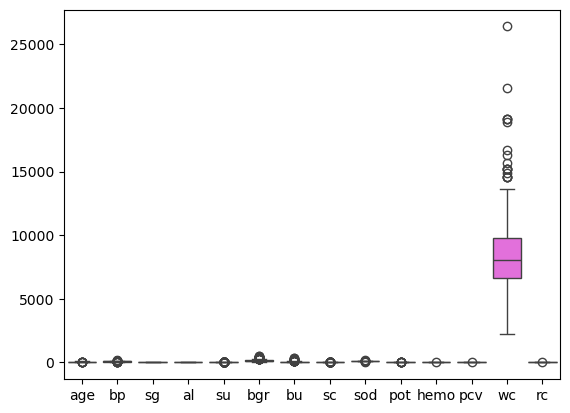

In [51]:
#checking outliers
sns.boxplot(kidney)

In [52]:
#Checking outliers
col=kidney.select_dtypes(include=["number"]).columns
for i in col:
    print(f"{i}: {kidney[i].skew()}")

age: -0.6722487475806098
bp: 1.5820508039606869
sg: -0.08625793947891705
al: 0.9015466151037131
su: 2.3782659641830843
bgr: 1.9964891631923583
bu: 2.659143489978693
sc: 7.6273939979679195
sod: -6.34301514155224
pot: 12.856514974637841
hemo: -0.25809915194014893
pcv: -0.29146995383242913
wc: 1.4056087279417513
rc: 0.08706168842026771


In [53]:
#treating outliers using IQR method
for i in col:
    q1 = kidney[i].quantile(0.25)
    q3 = kidney[i].quantile(0.75)
    iqr = q3 - q1

    ll = q1 - 1.5 * iqr  # Lower limit
    ul = q3 + 1.5 * iqr  # Upper limit

    kidney[i] = kidney[i].apply(lambda x: ll if x < ll else (ul if x > ul else x))

# Now check skewness again
for i in col:
    print(f"{i}: {kidney[i].skew()}")

age: -0.6311078574563551
bp: 0.0887184854127588
sg: -0.08625793947891705
al: 0.9015466151037131
su: 0.0
bgr: 1.0660278693054084
bu: 1.0782083858744351
sc: 1.1496448374139807
sod: -0.20739306771693647
pot: 0.28714802575536486
hemo: -0.24838437233096738
pcv: -0.2763238183728032
wc: 0.3781851075929756
rc: 0.04071632852891634


In [54]:
#Treating highly skewed data
skewed_cols = ['al','bgr', 'bu', 'sc']  
for i in skewed_cols:
    kidney[i] = np.log1p(kidney[i])  
    print(f"{i}: {kidney[i].skew()}")

al: 0.4839108550978248
bgr: 0.32315307108469604
bu: -0.04923637505323016
sc: 0.677005248310175


In [55]:
#remaing columns
kidney.rename(columns={
    'age': 'Age',
    'bp': 'Blood_Pressure',
    'sg': 'Specific_Gravity',
    'al': 'Albumin',
    'su': 'Sugar',
    'pc': 'Pus_Cells',
    'pcc': 'Pus_Cell_Casts',
    'ba': 'Bacteria',
    'bgr': 'Blood_Glucose_Random',
    'bu': 'Blood_Urea',
    'sc': 'Serum_Creatinine',
    'sod': 'Sodium',
    'pot': 'Potassium',
    'hemo': 'Hemoglobin',
    'pcv': 'Packed_Cell_Volume',
    'wc': 'White_Blood_Cell_Count',
    'rc': 'Red_Blood_Cell_Count',
    'htn': 'Hypertension',
    'dm': 'Diabetes_Mellitus',
    'cad': 'Coronary_Artery_Disease',
    'appet': 'Appetite',
    'pe': 'Pedal_Edema',
    'ane': 'Anemia'
}, inplace=True)


In [56]:
kidney.columns

Index(['Age', 'Blood_Pressure', 'Specific_Gravity', 'Albumin', 'Sugar',
       'Pus_Cells', 'Pus_Cell_Casts', 'Bacteria', 'Blood_Glucose_Random',
       'Blood_Urea', 'Serum_Creatinine', 'Sodium', 'Potassium', 'Hemoglobin',
       'Packed_Cell_Volume', 'White_Blood_Cell_Count', 'Red_Blood_Cell_Count',
       'Hypertension', 'Diabetes_Mellitus', 'Coronary_Artery_Disease',
       'Appetite', 'Pedal_Edema', 'Anemia', 'classification'],
      dtype='object')

In [57]:
#label encoding for categorical columns
from sklearn.preprocessing import LabelEncoder

label_cols = ['Pus_Cells', 'Pus_Cell_Casts', 'Bacteria', 
              'Hypertension', 'Diabetes_Mellitus', 'Coronary_Artery_Disease', 
              'Appetite', 'Pedal_Edema', 'Anemia']

for col in label_cols:
    le = LabelEncoder() 
    kidney[col] = le.fit_transform(kidney[col])
    print(f"Column: {col}")
    print({cls: idx for idx, cls in enumerate(le.classes_)})  


Column: Pus_Cells
{'abnormal': 0, 'normal': 1}
Column: Pus_Cell_Casts
{'notpresent': 0, 'present': 1}
Column: Bacteria
{'notpresent': 0, 'present': 1}
Column: Hypertension
{'no': 0, 'yes': 1}
Column: Diabetes_Mellitus
{'no': 0, 'yes': 1}
Column: Coronary_Artery_Disease
{'no': 0, 'yes': 1}
Column: Appetite
{'good': 0, 'poor': 1}
Column: Pedal_Edema
{'no': 0, 'yes': 1}
Column: Anemia
{'no': 0, 'yes': 1}


In [58]:
from sklearn.preprocessing import LabelEncoder

# Convert 'ckd' -> 1 and 'notckd' -> 0
label_encoder = LabelEncoder()
kidney["classification"]=label_encoder.fit_transform(kidney["classification"])
print({cls: idx for idx, cls in enumerate(le.classes_)})

{'no': 0, 'yes': 1}


In [59]:
#feature label split
x=kidney.drop("classification",axis=1)
y=kidney["classification"]


In [60]:
#feature Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [61]:
x

array([[0.49090909, 0.625     , 0.75      , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.75      , ..., 0.        , 0.        ,
        0.        ],
       [0.66060606, 0.625     , 0.25      , ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.05454545, 0.625     , 0.75      , ..., 0.        , 0.        ,
        0.        ],
       [0.11515152, 0.125     , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.61212121, 0.625     , 1.        , ..., 0.        , 0.        ,
        0.        ]])

In [62]:
#train test split
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(x,y , random_state=45,test_size=0.30)

In [63]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((280, 23), (120, 23), (280,), (120,))

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score

# Train Logistic Regression
lr_model = LogisticRegression(max_iter=10000, random_state=0)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

# Train Support Vector Classification
svc_model = SVC(kernel='rbf')   
svc_model.fit(X_train, y_train) 
svc_preds = svc_model.predict(X_test)

# Train Decision Tree Classification
dt_model = DecisionTreeClassifier(random_state=0,max_depth=2)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

# Train Random Forest
rf_model = RandomForestClassifier(random_state=0,max_depth=2)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# Train XGBoost
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

# Train naive bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_preds = nb_model.predict(X_test)

def evaluate_model(name, y_true, y_pred):
    print(f"Performance of {name}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.2f}")
    print(f"Precision: {precision_score(y_true, y_pred):.2f}")
    print(f"Recall: {recall_score(y_true, y_pred):.2f}")
    print(f"F1-score: {f1_score(y_true, y_pred):.2f}")
    print("-" * 30)

evaluate_model("Logistic Regression", y_test, lr_preds)
evaluate_model("Support Vector Classification", y_test, svc_preds)
evaluate_model("Decision Tree Classification", y_test, dt_preds)
evaluate_model("Random Forest Classification", y_test, rf_preds)
evaluate_model("XGBoost Classification", y_test, xgb_preds)
evaluate_model("Naive Bayes Classification", y_test, nb_preds)

Performance of Logistic Regression:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00
------------------------------
Performance of Support Vector Classification:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00
------------------------------
Performance of Decision Tree Classification:
Accuracy: 0.97
Precision: 0.94
Recall: 0.98
F1-score: 0.96
------------------------------
Performance of Random Forest Classification:
Accuracy: 0.98
Precision: 0.96
Recall: 1.00
F1-score: 0.98
------------------------------
Performance of XGBoost Classification:
Accuracy: 0.99
Precision: 0.98
Recall: 1.00
F1-score: 0.99
------------------------------
Performance of Naive Bayes Classification:
Accuracy: 0.97
Precision: 0.95
Recall: 1.00
F1-score: 0.97
------------------------------


In [65]:
from sklearn.model_selection import cross_val_score

best_model = SVC()
scores = cross_val_score(best_model, x, y, cv=5)  # 5-fold cross-validation

print("Cross-validation accuracy:", scores.mean())

Cross-validation accuracy: 0.9924999999999999


In [66]:
from sklearn.metrics import roc_auc_score

# Assuming`y_test is the true labels and y_probs are predicted probabilities from the model
y_probs = svc_model.decision_function(X_test)  
roc_auc = roc_auc_score(y_test, y_probs)

print(f"ROC-AUC Score: {roc_auc:.2f}")


ROC-AUC Score: 1.00


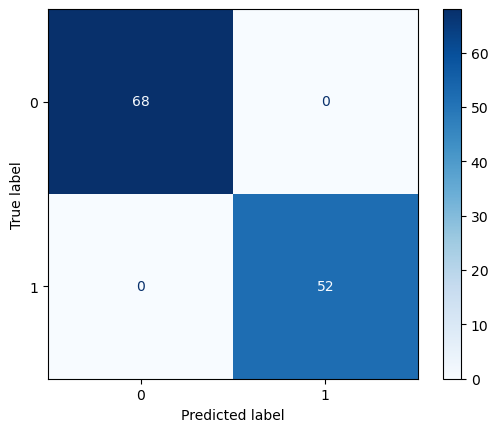

In [67]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get predictions
y_pred = svc_model.predict(X_test)

# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.show()


In [69]:
import pickle

with open("kidney_disease_prediction_model.pkl", "wb") as file:
    pickle.dump(svc_model, file)

In [71]:
import os

model_path = os.path.abspath("kidney_disease_prediction_model.pkl")

print(f"Model saved at: {model_path}")

Model saved at: C:\Users\DELL\kidney_disease_prediction_model.pkl
